#Modelo de Cassificação - Bank GM

##1. Definicao das bibliotecas

In [37]:
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import model_selection
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from warnings import filterwarnings

filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [24, 12]

##2. Definicao da semente para geracao de numereos aleatorios

In [6]:

seed = 7; seed


7

##3. Leitura dos dados

In [14]:
#names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
#dataframe = pandas.read_csv("pima-indians-diabetes.csv", names=names)

dataframe = pandas.read_csv("/content/bank-full.csv", sep=";")

##4. A analise exploratoria dos dados realizada (Script Entrege)

### 4.1 Contagem de Nulls e confirmação valores faltantes

In [15]:
print("Apresentando o shape dos dados (dimenssoes)")
print(dataframe.shape)

Apresentando o shape dos dados (dimenssoes)
(45211, 17)


In [40]:
print("Apresentando as colunas")
print(dataframe.columns)

Apresentando as colunas
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [18]:
print("Visualizando o conjunto inicial (head) dos dados, ou mais claramente, os 5 primeiros registros (head(5))")
dataframe.head(5)

Visualizando o conjunto inicial (head) dos dados, ou mais claramente, os 5 primeiros registros (head(5))


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [19]:
print("Conhecendo os dados estatisticos dos dados carregados (describe)")
dataframe.describe()

Conhecendo os dados estatisticos dos dados carregados (describe)


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [20]:
print("Conhecendo a distribuicao dos dados por classes (class distribution)")
dataframe.groupby('y').size()

Conhecendo a distribuicao dos dados por classes (class distribution)


y
no     39922
yes     5289
dtype: int64

Criando grafios de caixa da distribuicao das classes


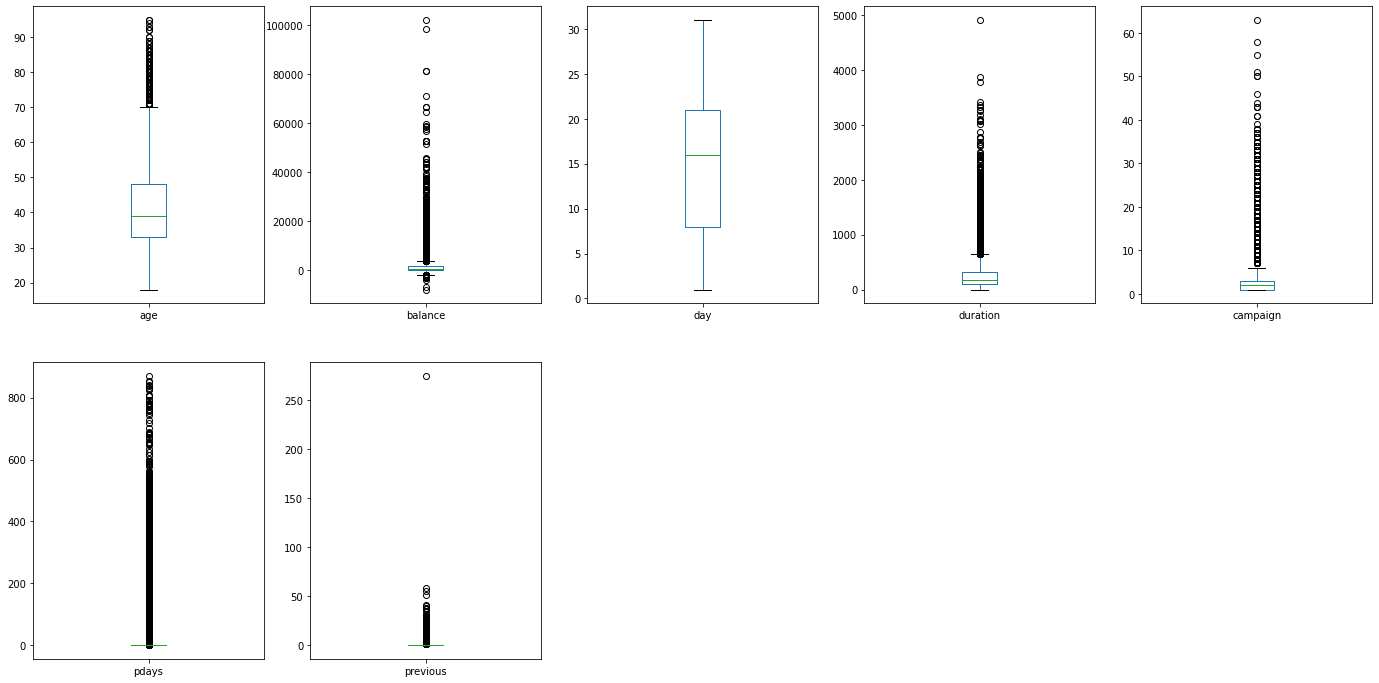

In [35]:
print("Criando grafios de caixa da distribuicao das classes")
dataframe.plot(kind='box', subplots=True, layout=(2,5), sharex=False, sharey=False)
plt.show()

Criando histogramas dos dados por classes


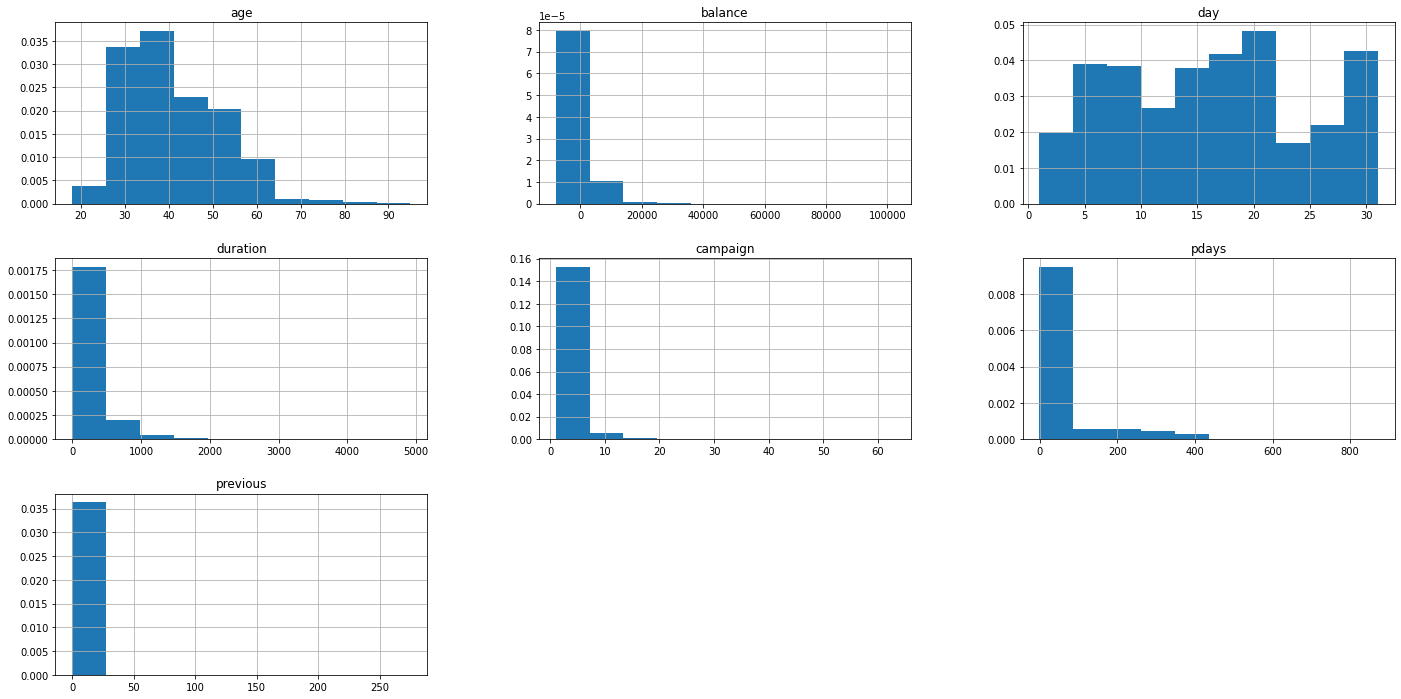

In [36]:
print("Criando histogramas dos dados por classes")
dataframe.hist(density=True)
plt.show()

Criando graficos de dispersao dos dados com paleta de cores


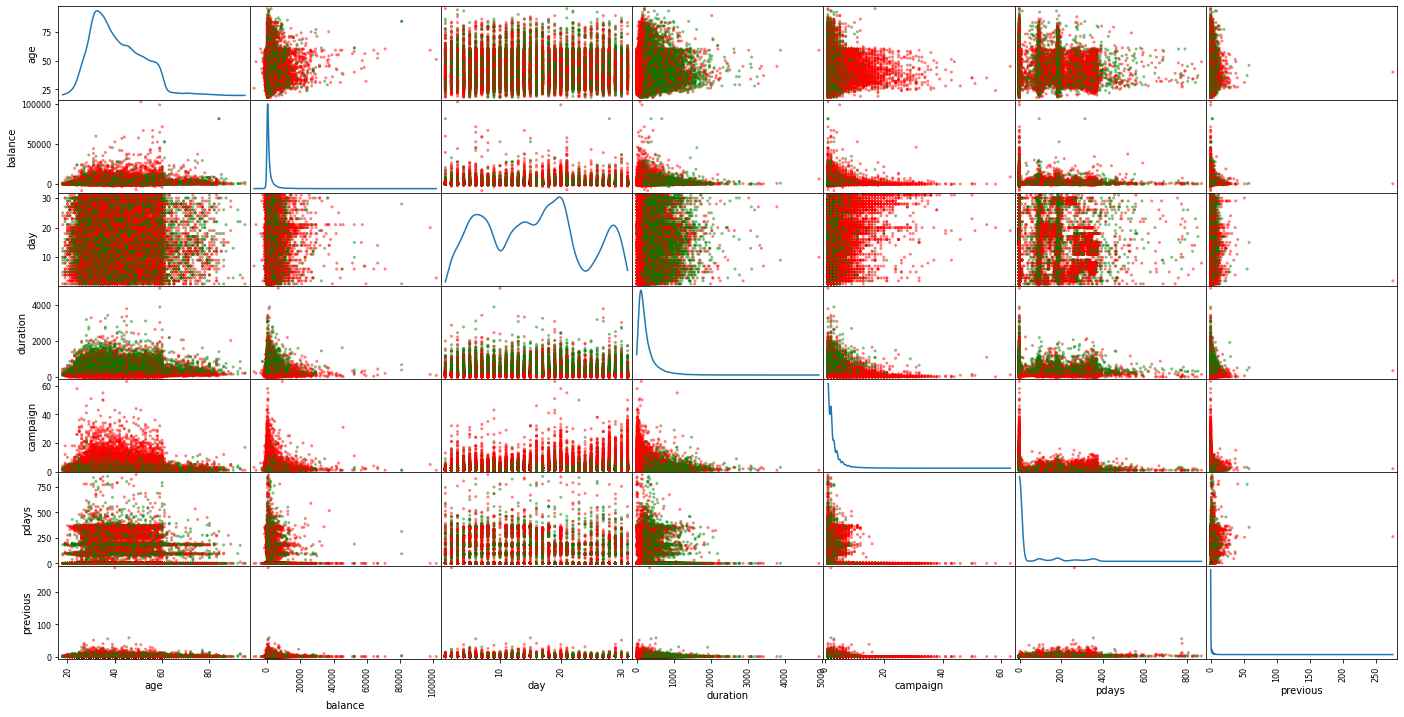

In [38]:
print("Criando graficos de dispersao dos dados com paleta de cores")
colors_palette = {'no': 'red', 'yes': 'green'}
colors = [colors_palette[c] for c in dataframe['y']]
scatter_matrix(dataframe, c=colors, diagonal='kde')
plt.show()

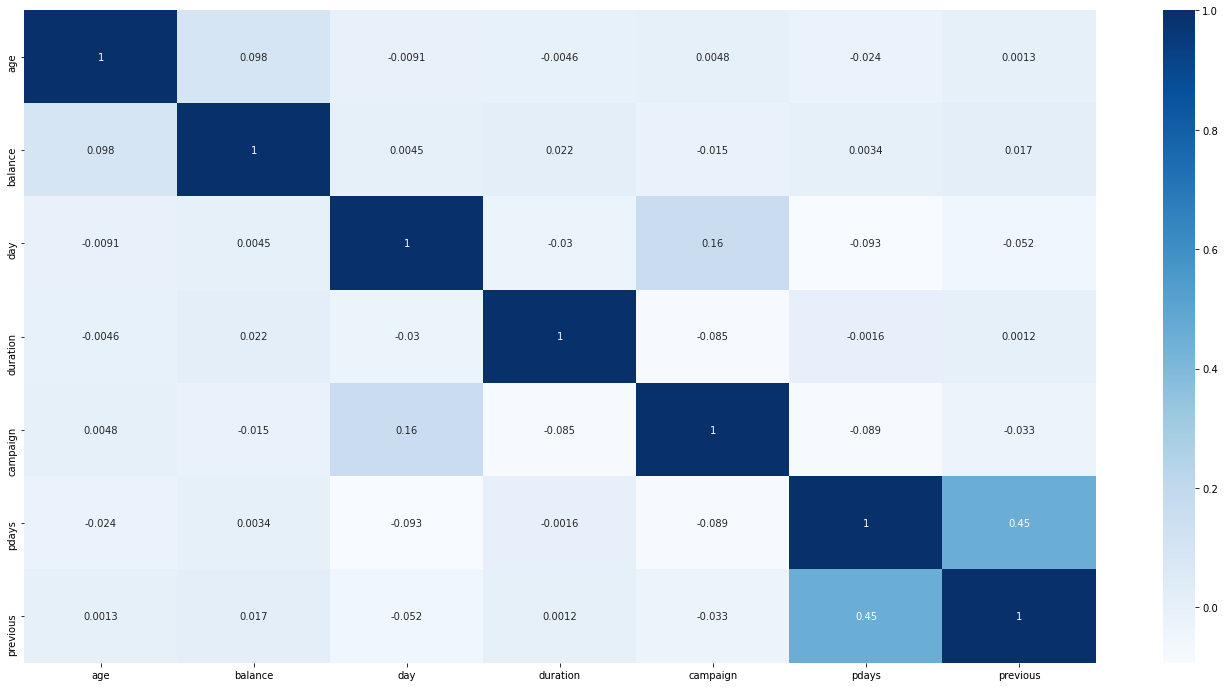

In [41]:
ax=sns.heatmap(dataframe.corr(), cmap='Blues', annot=True )
plt.show()

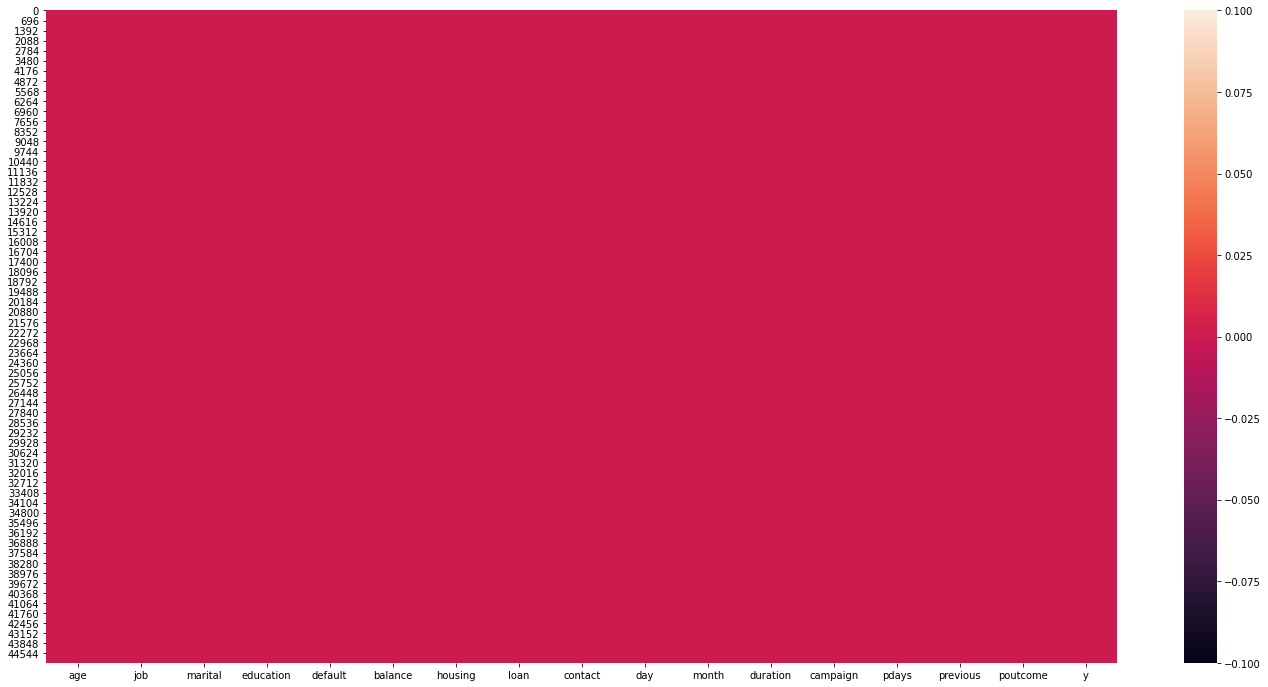

In [42]:
sns.heatmap(dataframe.isna())

In [43]:
print("Realiza a contagem de valores NaN em cada coluna")
print(dataframe.isnull().sum())

Realiza a contagem de valores NaN em cada coluna
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


##5. Preparacao dos dados conduzida em outro script

In [44]:
print("Apresentando o shape dos dados (dimenssoes)")
print(dataframe.shape)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

Apresentando o shape dos dados (dimenssoes)
(45211, 17)


##6. Divisao da base de dados em treinamento, validacao e teste

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=seed)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, random_state=seed)

##7. Realizar busca com o gridsearch para encontrar os melhores parametros de cada modelo

##8. Definicao dos modelos de classificacao

### 8.1 Criacao dos modelos com os melhores parametros

In [ ]:
RFC = RandomForestClassifier(n_estimators=10,random_state=seed)
DTC = tree.DecisionTreeClassifier(criterion='entropy', random_state=seed)
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,5), random_state=seed)
BMLP = BaggingClassifier(base_estimator=MLP, n_estimators=10, random_state=seed)

### 8.2 Adiciona os modelos em uma lista

In [ ]:
models = []
models.append(('Arvore', DTC))
models.append(('ComiteArvore', RFC))
models.append(('RedeNeural', MLP))
models.append(('ComiteRede', BMLP))

### 8.3 Evaluate each model in turn

In [ ]:
results = []
names = []

###8.4 Defição da metrica a ser utilizada

In [ ]:
scoring = 'accuracy'

##9. Definicao do modelo experimental

### 9.1 Amostragem estratificada

In [47]:
kfold = model_selection.StratifiedKFold(n_splits=10, random_state=seed)

##10 Execucao do modelo experimental

### Avaliacao de cada modelo nas amotragens estratificas

In [ ]:
print('\nDesempenhos medios dos modelos:')
for name, model in models:
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

##11 Comparacao de modelos

### 11.1 Teste de hipotese analisando o p-value

In [ ]:
stat, p = stats.kruskal(results[0],results[1],results[2],results[3])
alpha = 0.05
if p > alpha:
	print('\nSame distributions (fail to reject H0)')
else:
	print('\nDifferent distributions (reject H0)')
print('\nComparison stats', stat)

print('Comparacao Arvore | ComiteArvore ->', stats.kruskal(results[0],results[1]))
print('Comparacao Arvore | RedeNeural ->',stats.kruskal(results[0],results[2]))
print('Comparacao Arvore | CRNA ->',stats.kruskal(results[0],results[3]))
print('Comparacao ComiteArvore | RedeNeural ->',stats.kruskal(results[1],results[2]))
print('Comparacao ComiteArvore | ComiteRede ->',stats.kruskal(results[1],results[3]))
print('Comparacao RedeNeural | ComiteRede ->',stats.kruskal(results[2],results[3]))	

### 11.2 Treinamento dos modelos no conjunto de treino completo (sem divisao de validacao)

In [ ]:
RFC.fit(X_train, y_train);
DTC.fit(X_train, y_train);
MLP.fit(X_train, y_train);
BMLP.fit(X_train, y_train);

### 11.3 Predicao de cada modelo para a base de teste

In [ ]:
Y_test_prediction_RFC = RFC.predict(X_test)
Y_test_prediction_DTC = DTC.predict(X_test)
Y_test_prediction_MLP = MLP.predict(X_test)
Y_test_prediction_BMLP = BMLP.predict(X_test)

## 12 Apresentacao de resultados

In [ ]:

print("\nAcuracia Comite de Arvore: Treinamento",  RFC.score(X_train, y_train)," Teste" ,RFC.score(X_test, y_test))
print("Clasification report:", classification_report(y_test, Y_test_prediction_RFC))
print("Confussion matrix:\n", confusion_matrix(y_test, Y_test_prediction_RFC))

print("\nAcuracia Arvore: Treinamento",  DTC.score(X_train, y_train)," Teste" ,DTC.score(X_test, y_test))
print("Clasification report:", classification_report(y_test, Y_test_prediction_DTC))
print("Confussion matrix:\n", confusion_matrix(y_test, Y_test_prediction_DTC))

print("\nAcuracia Rede Neural: Treinamento",  MLP.score(X_train, y_train)," Teste" ,MLP.score(X_test, y_test))
print("Clasification report:", classification_report(y_test, Y_test_prediction_MLP))
print("Confussion matrix:\n", confusion_matrix(y_test, Y_test_prediction_MLP))

print("\nAcuracia Comite RNA: Treinamento",  BMLP.score(X_train, y_train)," Teste" ,BMLP.score(X_test, y_test))
print("Clasification report:", classification_report(y_test, Y_test_prediction_BMLP))
print("Confussion matrix:\n", confusion_matrix(y_test, Y_test_prediction_BMLP))

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()	


# Significance stats tests

##1. Definicao das bibliotecas

In [ ]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu
from scipy.stats import friedmanchisquare
from scipy.stats import kruskal
from scipy.stats import wilcoxon


## 2. Seed the random number generator

In [ ]:
seed(1)

## 3. Generate three independent samples

In [ ]:
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 50
data3 = 5 * randn(100) + 52

## 4. Compare samples

### 4.1 Mann-Whitney

In [ ]:
stat, p = mannwhitneyu(data1, data2)
print('Mann-Whitney Statistic: s=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

### 4.2 Wilcoxon

In [ ]:
stat, p = wilcoxon(data1, data2)
print('Wilcoxon Statistic: s=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

### 4.3 Kruskal-Wallis

In [ ]:
stat, p = kruskal(data1, data2, data3)
print('Kruskal-Wallis Statistic: s=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

### 4.4 Friedman

In [ ]:
stat, p = friedmanchisquare(data1, data2, data3)
print('Friedman Statistic: s=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Mann-Whitney Statistic: s=4597.000, p=0.163
Same distributions (fail to reject H0)
Wilcoxon Statistic: s=2314.000, p=0.468
Same distributions (fail to reject H0)
Kruskal-Wallis Statistic: s=6.051, p=0.049
Different distributions (reject H0)
Friedman Statistic: s=9.360, p=0.009
Different distributions (reject H0)


# Random search Decision Tree Model on the pima-diabetes dataset

##1. Definicao das bibliotecas

In [ ]:
from pandas import read_csv
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

## 2. Leitura dos dados

In [ ]:
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv("pima-indians-diabetes.csv", names=names)

## 3. Preparacao dos dados conduzida em outro script

In [ ]:
print("Apresentando o shape dos dados (dimenssoes)")
print(dataframe.shape)
array = dataframe.values
X = array[:,0:8]
y = array[:,8]

## 4. Define model

In [ ]:
model = DecisionTreeClassifier()

## 5. Define evaluation

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

## 6. Define Search Space

In [ ]:
space = dict()
space['criterion'] = ['gini', 'entropy']
space['min_samples_split'] = [2,3,5,7]
space['max_depth'] = [3,5,6,7,9,11,13,15,17,19]
space['min_samples_leaf'] = [1, 2, 3]

## 7. Define random search

In [ ]:
search = RandomizedSearchCV(model, space, n_iter=200, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)

### 7.1 Execute Search

In [ ]:
result = search.fit(X, y)

### 7.2 Summarize result

In [ ]:
print('=========Random Search Results==========')
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

### 7.3 Define Grid Search

In [ ]:
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=cv)

### 7.4 Execute Search

In [ ]:
result = search.fit(X, y)

print('=========Grid Search Results==========')
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

